In [1]:
import sys
sys.path.append('../')
 
from FO1st import *

In [2]:
def testParser(input_text, showOption='polish', verbose=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'bussproof' | 'tree'
  # 'bussproof' output is LaTeX source text.
  # verbose has effect only when showOption == 'polish', 'RPN' or 'tree'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(verbose))
    elif showOption=='RPN':
      print(ast.build_RPN(verbose))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      print("\n$", s, "$") # latex source text
      display(Math(f"${s}$")) # render LaTeXed expression
    elif showOption=='bussproof':
      s = ast.build_bussproof() 
      print(s)
    elif showOption=='tree':
      ast.draw_tree(verbose)
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

- f_23 - x - - c 12

$ -f_{2}(-x, -(-c), 12) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-f_{2}(-x, -(-c), 12)$}
\end{prooftree}

root: -f_{2}(-x, -(-c), 12), position: (0.000, 0.000), width: 2.291, height: 0.120



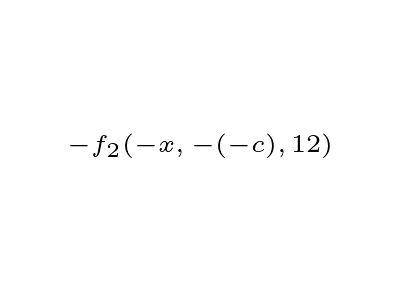

In [3]:
# term example 1

v_str1 = "-f_23(-x, --c, 12)"
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure
testParser(v_str1, 'tree', verbose=True) # term has no tree structure


+ - x - + y x

$ -x + (-(y + x)) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-x + (-(y + x))$}
\end{prooftree}

root: -x + (-(y + x)), position: (0.000, 0.000), width: 1.912, height: 0.120



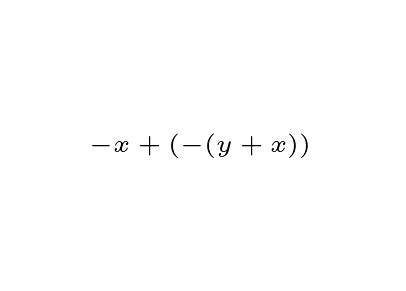

In [4]:
# term example 2

v_str1 = "-x + (-(y+x))" 

testParser(v_str1) 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure
testParser(v_str1, 'tree', verbose=True) # term has no tree structure


In [5]:
# term example 3

v_str1 = "x / (y div z)" 

testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

/ x div y z

$ x / (y \div z) $


<IPython.core.display.Math object>

In [6]:
# term example 4

v_str1 = "(a+c)^b" 
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

^ + a c b

$ (a + c)^{b} $


<IPython.core.display.Math object>

In [18]:
# term example 5

v_str1 = "a^inv^#^2" 
testParser(v_str1) 
testParser(v_str1, 'infix_latex') 

^ ^# ^inv a 2

$ ((a^{-1})^\#)^{2} $


<IPython.core.display.Math object>

and A2 x y > f2 x y 2

$ A(x, y)\: \wedge\: f(x, y) > 2 $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y$}
\BinaryInfC{$A$}
\AxiomC{$f(x, y)$}
\AxiomC{$2$}
\BinaryInfC{$>$}
\BinaryInfC{$\wedge$}
\end{prooftree}

root: \wedge, position: (0.000, 0.000), width: 2.275, height: 0.600
root: A, position: (-0.659, 0.240), width: 0.645, height: 0.360
root: x, position: (-0.251, 0.240), width: 0.150, height: 0.120
root: y, position: (0.251, 0.240), width: 0.136, height: 0.120
root: >, position: (0.659, 0.240), width: 1.270, height: 0.360
root: f(x, y), position: (-0.408, 0.240), width: 0.779, height: 0.120
root: 2, position: (0.408, 0.240), width: 0.131, height: 0.120



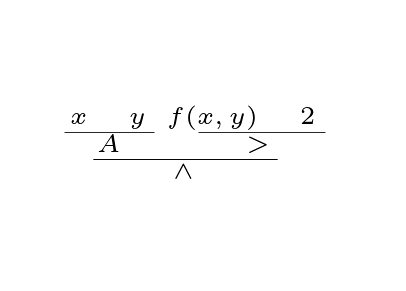

In [7]:
# formula example 1

v_str = 'A2(x, y) and f2(x,y) > 2'
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

imp not A and = y y not > ^ x 2 f2 + x 1 y

$ \neg\, A\: \rightarrow\: y = y\: \wedge\: \neg\, (x^{2} > f(x + 1, y)) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A$}
\UnaryInfC{$\neg$}
\AxiomC{$y$}
\AxiomC{$y$}
\BinaryInfC{$=$}
\AxiomC{$x^{2}$}
\AxiomC{$f(x + 1, y)$}
\BinaryInfC{$>$}
\UnaryInfC{$\neg$}
\BinaryInfC{$\wedge$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}

root: \rightarrow, position: (0.000, 0.000), width: 3.413, height: 1.080
root: \neg, position: (-0.943, 0.240), width: 0.198, height: 0.360
root: A, position: (-0.000, 0.240), width: 0.198, height: 0.120
root: \wedge, position: (0.943, 0.240), width: 2.855, height: 0.840
root: =, position: (-0.804, 0.240), width: 0.631, height: 0.360
root: y, position: (-0.248, 0.240), width: 0.136, height: 0.120
root: y, position: (0.248, 0.240), width: 0.136, height: 0.120
root: \neg, position: (0.804, 0.240), width: 1.863, height: 0.600
root: >, position: (-0.000, 0.240), width: 1.863, height: 0.360
root: x^{2}, position: (-0.556, 0.240), width: 0.271, height: 0.120
root: f(x + 1, y), position: (0.556, 0.240), width: 1.232, height: 0.120



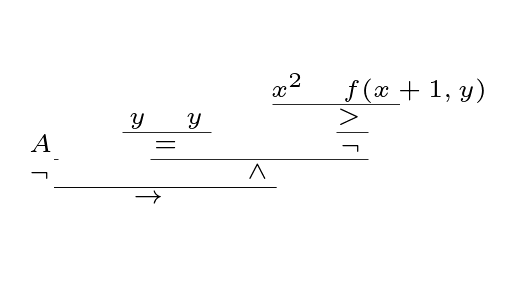

In [20]:
# formula example 2

v_str = "not A imp y = y and not x^2 > f2(x + 1, y)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)


and < x ^ y 2 <= ^ y 2 + u f 1

$ x < y^{2} \le u + f(1) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y^{2}$}
\BinaryInfC{$<$}
\AxiomC{$y^{2}$}
\AxiomC{$u + f(1)$}
\BinaryInfC{$\le$}
\BinaryInfC{$\wedge$}
\end{prooftree}

root: \wedge, position: (0.000, 0.000), width: 2.730, height: 0.600
root: <, position: (-0.772, 0.240), width: 0.774, height: 0.360
root: x, position: (-0.284, 0.240), width: 0.150, height: 0.120
root: y^{2}, position: (0.284, 0.240), width: 0.265, height: 0.120
root: \le, position: (0.772, 0.240), width: 1.595, height: 0.360
root: y^{2}, position: (-0.489, 0.240), width: 0.265, height: 0.120
root: u + f(1), position: (0.489, 0.240), width: 0.970, height: 0.120



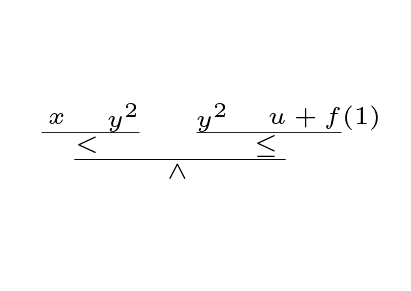

In [21]:
v_str = "x < y^2 <= u+f(1)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

and and < ^ x 2 + ^ y - / 1 2 1 = + ^ y - / 1 2 1 - z sim - z f u

$ x^{2} < y^{-1 / 2} + 1 = -z \sim f(u) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x^{2}$}
\AxiomC{$y^{-1 / 2} + 1$}
\BinaryInfC{$<$}
\AxiomC{$y^{-1 / 2} + 1$}
\AxiomC{$-z$}
\BinaryInfC{$=$}
\BinaryInfC{$\wedge$}
\AxiomC{$-z$}
\AxiomC{$f(u)$}
\BinaryInfC{$\sim$}
\BinaryInfC{$\wedge$}
\end{prooftree}

root: \wedge, position: (0.000, 0.000), width: 5.621, height: 0.840
root: \wedge, position: (-1.495, 0.240), width: 4.049, height: 0.600
root: <, position: (-1.102, 0.240), width: 1.813, height: 0.360
root: x^{2}, position: (-0.543, 0.240), width: 0.271, height: 0.120
root: y^{-1 / 2} + 1, position: (0.543, 0.240), width: 1.182, height: 0.120
root: =, position: (1.102, 0.240), width: 1.876, height: 0.360
root: y^{-1 / 2} + 1, position: (-0.559, 0.240), width: 1.182, height: 0.120
root: -z, position: (0.559, 0.240), width: 0.334, height: 0.120
root: \sim, position: (1.495, 0.240), width: 1.212, height: 0.360
root: -z, position: (-0.393, 0.240), width: 0.334, height: 0.120
root: f(u), position: (0.393, 0.240), width: 0.518, height: 0.120



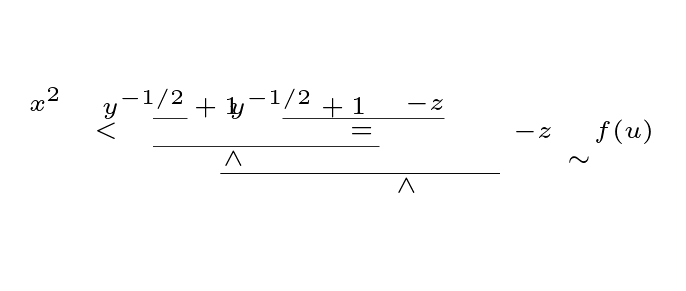

In [22]:
v_str = "x^2 < y^(-1/2)+1 =  -z  sim f(u)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

forall x not A1 x

$ \forall x\, \neg\, A(x) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\UnaryInfC{$A$}
\UnaryInfC{$\neg$}
\UnaryInfC{$\forall x$}
\end{prooftree}

root: \forall x, position: (0.000, 0.000), width: 0.150, height: 0.840
root: \neg, position: (-0.000, 0.240), width: 0.150, height: 0.600
root: A, position: (-0.000, 0.240), width: 0.150, height: 0.360
root: x, position: (-0.000, 0.240), width: 0.150, height: 0.120



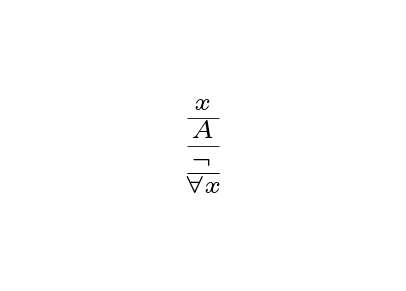

In [23]:
v_str = "forall x not A1(x)"
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)


iff forall y >= f x y exists x B1 x

$ \forall y\, (f(x) \ge y)\: \leftrightarrow\: \exists x\, B(x) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$f(x)$}
\AxiomC{$y$}
\BinaryInfC{$\ge$}
\UnaryInfC{$\forall y$}
\AxiomC{$x$}
\UnaryInfC{$B$}
\UnaryInfC{$\exists x$}
\BinaryInfC{$\leftrightarrow$}
\end{prooftree}

root: \leftrightarrow, position: (0.000, 0.000), width: 1.514, height: 0.840
root: \forall y, position: (-0.469, 0.240), width: 1.005, height: 0.600
root: \ge, position: (-0.000, 0.240), width: 1.005, height: 0.360
root: f(x), position: (-0.341, 0.240), width: 0.509, height: 0.120
root: y, position: (0.341, 0.240), width: 0.136, height: 0.120
root: \exists x, position: (0.469, 0.240), width: 0.150, height: 0.600
root: B, position: (-0.000, 0.240), width: 0.150, height: 0.360
root: x, position: (-0.000, 0.240), width: 0.150, height: 0.120



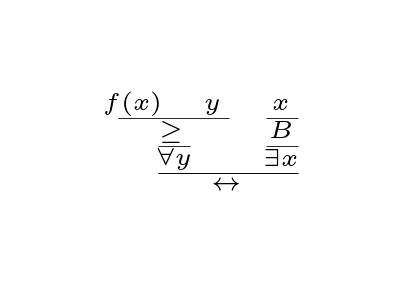

In [24]:
v_str = "forall y  f(x) >= y iff exists x B1(x) "
testParser(v_str)
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)
